In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-9-34e5d19ff7ab>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


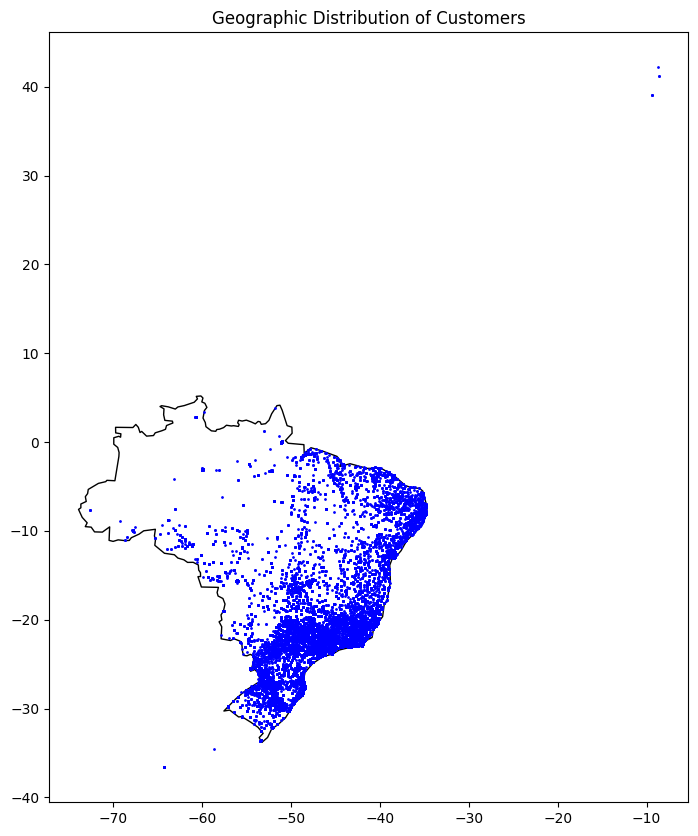

In [9]:
# Set the path to the folder containing your files
folder_path = '/content/drive/My Drive/bdm_final_project/olist_data_for_bdm/'

# Import necessary libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Load the datasets
geolocation = pd.read_csv(folder_path + 'olist_geolocation_dataset.csv')
customers = pd.read_csv(folder_path + 'olist_customers_dataset.csv')

# Merge the customers dataset with the geolocation dataset
merged_data = pd.merge(customers, geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

# Drop duplicates to avoid plotting the same point multiple times
merged_data = merged_data.drop_duplicates(subset=['customer_id'])

# Convert the merged data into a GeoDataFrame
gdf = gpd.GeoDataFrame(merged_data, geometry=gpd.points_from_xy(merged_data.geolocation_lng, merged_data.geolocation_lat))

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
# Plot the world map
world[world.name == 'Brazil'].plot(ax=ax, color='white', edgecolor='black')
# Plot the customer points
gdf.plot(ax=ax, markersize=1, color='blue')
plt.title('Geographic Distribution of Customers')
plt.show()

import folium

# Assuming you have latitude and longitude data for customers
# Let's take the mean of the latitude and longitude for the center of the map
lat_center = merged_data['geolocation_lat'].mean()
lng_center = merged_data['geolocation_lng'].mean()

# Create a map centered around the mean coordinates
m = folium.Map(location=[lat_center, lng_center], zoom_start=4)

# Add points to the map
for idx, row in merged_data.iterrows():
    folium.CircleMarker([row['geolocation_lat'], row['geolocation_lng']],
                        radius=1,
                        color='blue',
                        fill=True,
                        fill_color='blue').add_to(m)

# Display the map
m
